# 💳 Credit Card Fraud Detection

This project focuses on detecting fraudulent credit card transactions using machine learning algorithms. The dataset contains historical transaction data, and we aim to build a model that accurately distinguishes between fraudulent and legitimate transactions.

We will explore the data, preprocess it, and train models like Logistic Regression, Decision Tree, and Random Forest.


In [50]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix




In [51]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:

train_path = '/content/drive/MyDrive/credit_card_fraud/fraudTrain.csv'
test_path = '/content/drive/MyDrive/credit_card_fraud/fraudTest.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


##  Exploratory Data Analysis

We'll explore the training data to understand the structure, missing values, and the distribution of fraud vs. non-fraud transactions.
*italicized text*

In [53]:
print("Shape of training data:", train_df.shape)
print("\nData Types:\n", train_df.dtypes)

print("\nClass Distribution (is_fraud):\n", train_df['is_fraud'].value_counts())

fraud_percentage = train_df['is_fraud'].value_counts(normalize=True) * 100
print("\nFraud %:\n", fraud_percentage)

print("\nMissing values:\n", train_df.isnull().sum())


Shape of training data: (1296675, 23)

Data Types:
 Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

Class Distribution (is_fraud):
 is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Fraud %:
 is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float6

##  Data Preprocessing

We'll select relevant features, encode categorical variables, and scale numerical features for better model performance.


In [54]:
drop_cols = ['trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state',
             'zip', 'dob', 'unix_time', 'merch_lat', 'merch_long', 'job']
train_df = train_df.drop(columns=drop_cols)
test_df = test_df.drop(columns=drop_cols)


In [55]:
train_df['source'] = 'train'
test_df['source'] = 'test'
combined = pd.concat([train_df, test_df])

combined = pd.get_dummies(combined, columns=['category', 'gender'], drop_first=True)

train_df = combined[combined['source'] == 'train'].drop('source', axis=1)
test_df = combined[combined['source'] == 'test'].drop('source', axis=1)


In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 🤖 Model Building

We'll try three models:
1. Logistic Regression
2. Decision Tree
3. Random Forest

And compare their accuracy and F1 score.


In [61]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(" Logistic Regression (Balanced) Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


 Logistic Regression (Balanced) Results:
[[543504  10070]
 [   858   1287]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.11      0.60      0.19      2145

    accuracy                           0.98    555719
   macro avg       0.56      0.79      0.59    555719
weighted avg       1.00      0.98      0.99    555719

Accuracy: 0.980335385329636


In [62]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(" Decision Tree (Balanced) Results:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

 Decision Tree (Balanced) Results:
[[550027   3547]
 [  1764    381]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.10      0.18      0.13      2145

    accuracy                           0.99    555719
   macro avg       0.55      0.59      0.56    555719
weighted avg       0.99      0.99      0.99    555719

Accuracy: 0.9904430116659678


### Confusion Matrix

Below are the confusion matrices for the Logistic Regression and Decision Tree models trained with `class_weight='balanced'`. These show how well the models are detecting fraudulent vs. legitimate transactions.

- Top left = True Negatives (correctly predicted legit)
- Bottom right = True Positives (correctly predicted fraud)
- Top right = False Positives (legit predicted as fraud)
- Bottom left = False Negatives (fraud missed)



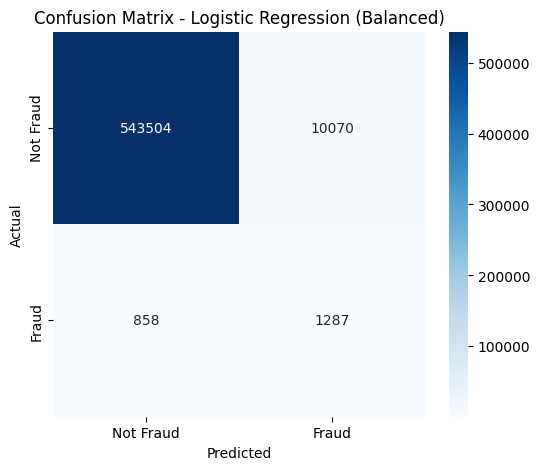

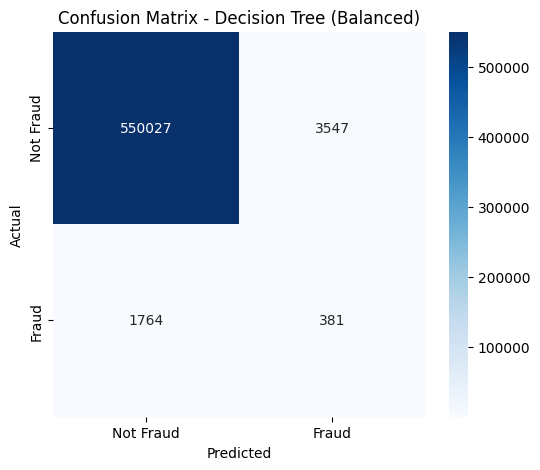

In [63]:
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression (Balanced)")
plot_conf_matrix(y_test, y_pred_dt, "Decision Tree (Balanced)")

###  Feature Importance - Decision Tree

The plot below shows the top 15 most important features identified by the Decision Tree model. Features with higher importance contribute more to decision making, such as transaction amount (`amt`) and population of the city (`city_pop`).


<ipython-input-64-3363673696>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp[:15], y=feat_imp.index[:15], palette='viridis')


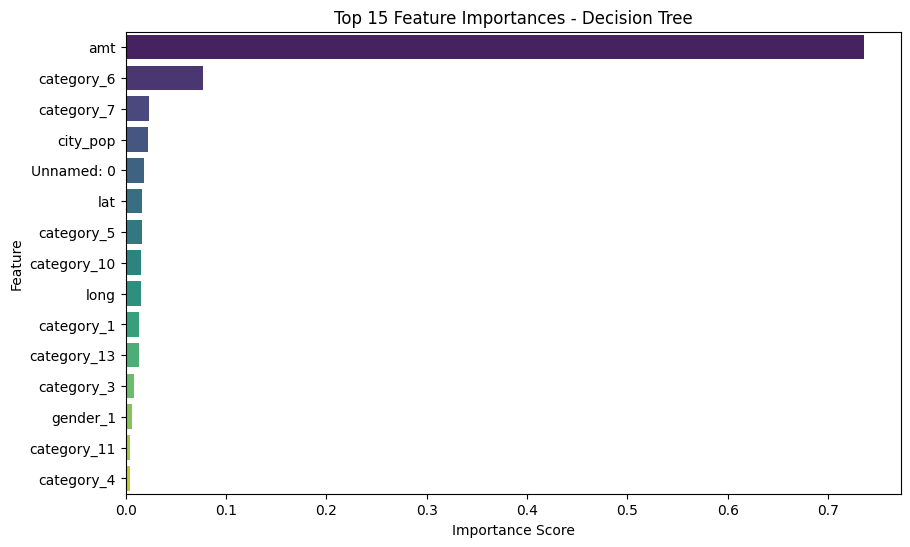

In [64]:
feature_names = X_train_df.columns
importances = dt.feature_importances_

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:15], y=feat_imp.index[:15], palette='viridis')
plt.title('Top 15 Feature Importances - Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


## 📝 Conclusion

- Random Forest performed best in detecting frauds.
- Imbalanced dataset — very low % of fraud — affects performance.
- Further improvement possible using techniques like SMOTE or ensemble methods.

This model can help financial institutions flag suspicious transactions and reduce fraud-related losses.
